In [19]:
# Packages
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

# Definitions
rng=np.random.default_rng()

In [20]:
# First we load the list of words
with open("words_alpha.txt") as file:
    English_words = file.readlines()

# Due the format we have to drop the last two letters in each string
for i in range(English_words.__len__()):
    English_words[i]=English_words[i].replace("\n"," ")

## Joint letter correlation functions
________
The first type of distributions that we are interested in are $k$-letter correlation functions,

$$P(x_{1},x_{2},\dots,x_{k}): \mathcal{A}^{\times k} \rightarrow [0,1],$$

defined as the probability that the specific sequence of letters $x_{1}x_{2}\dots x_{k}$ appear in an arbitrary word.

### Single letter correlation function:
The first of such distributions, i.e. the single-letter correlation function $P(x)$, measures the frequency of the single letter $x$ in the language.

In [21]:
# English alphabet, here I only consider lowercase letters!
alphabet = ["a","b","c","d","e","f","g","h","i","j","k",
            "l","m","n","o","p","q","r","s","t","u","v",
            "w","x","y","z"] 

# Creates a list of all single letters with multiplicities
merged_English_words = "".join(English_words)

# Dictionary with the frequency of each letter
single_letter_freq = {} 

for letter in alphabet:
    single_letter_freq[letter] =  merged_English_words.count(letter)   


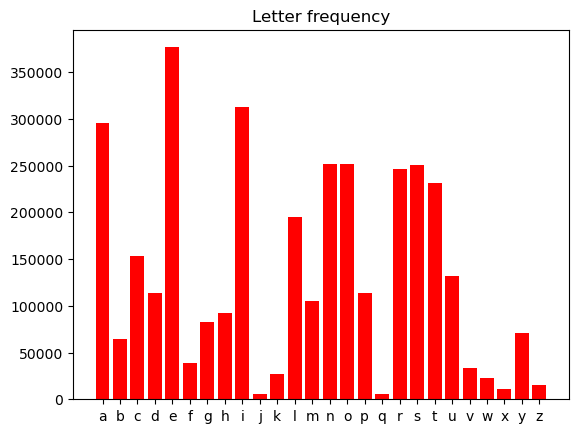

In [22]:
#Plot
plt.bar(single_letter_freq.keys(),
        single_letter_freq.values(), color="red") # one uses bar when the keys are strings!
plt.title("Letter frequency");

### Two-letter distribution
_________

The two-letter correlation function P(x,y) measures the amount of correlation between pairs of letters. This is the first letter-distribution that introduces two new main features which be recurrent in upper distributions: 

1. Non-symmetric: The probability of having the pair "az" is different of the one of "za". This is a result of the inherit asymmetry of the particular language chosen. 
 
2. super-selection rules: In every language there will be certain combinations of letters impossible to appear, i.e "wx" never appears in english. Generally, this type of prohibited combinations will be reflected in the zeros of the distribution.

In [23]:
# cartesian product of the alphabet: \mathcal{A}x\mathcal{A}
alphabet_pow_2 = [i + j for i in alphabet for j in alphabet]

# Letter tuple frequency 
two_letter_freq = {}

for letter_pair in alphabet_pow_2:
    two_letter_freq[letter_pair] = merged_English_words.count(letter_pair) 


#two-letter joint probability
two_letter_joint = {}

for letter_1 in alphabet:
    two_letter_joint[letter_1] = {letter_2 : two_letter_freq[letter_1+letter_2] for letter_2 in alphabet}

    
# normalize two-letter joint
N_two_letter_joint = {}

for letter_1 in alphabet:
    N_two_letter_joint[letter_1] = {letter_2 : two_letter_joint[letter_1][letter_2]/sum(two_letter_joint[letter_1].values()) for letter_2 in alphabet}



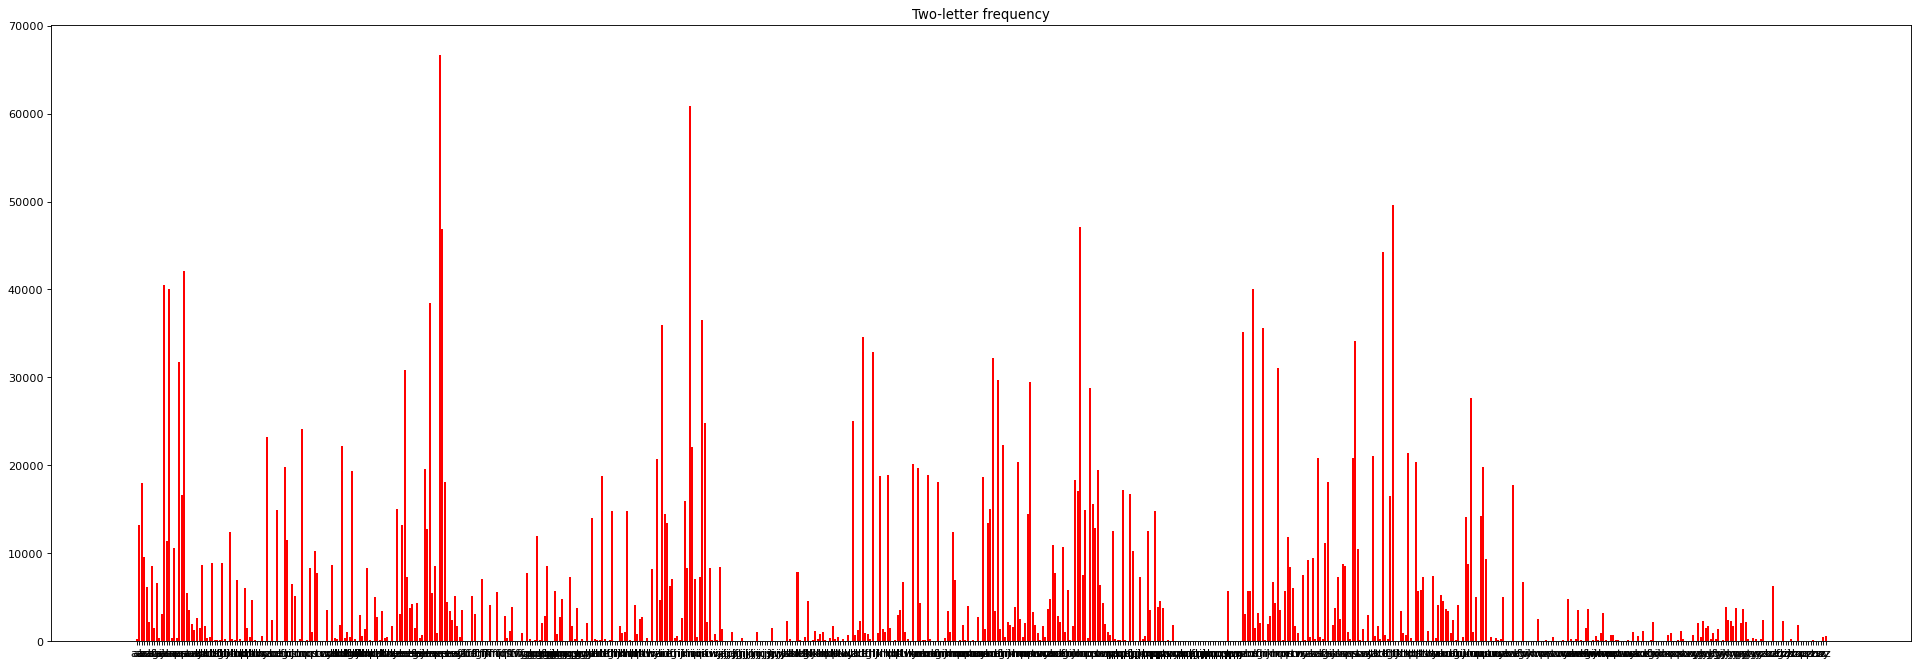

In [24]:
#plots
figure(figsize=(30, 10), dpi=80)
plt.bar(two_letter_freq.keys(),
        two_letter_freq.values(), color="red"); 
plt.title("Two-letter frequency");

### Three-letter correlation

In [25]:
"""
# alphabet triple product: \mathcal{A}x\mathcal{A}x\mathcal{A}
alphabet_pow_3 = [letter_1+letter_2+letter_3 for letter_1 in alphabet for letter_2 in alphabet for letter_3 in alphabet]

three_letter_frequency = {}

for letter_triple in alphabet_pow_3:
    three_letter_frequency[letter_triple] = merged_English_words.count(letter_triple)  
"""

'\n# alphabet triple product: \\mathcal{A}x\\mathcal{A}x\\mathcal{A}\nalphabet_pow_3 = [letter_1+letter_2+letter_3 for letter_1 in alphabet for letter_2 in alphabet for letter_3 in alphabet]\n\nthree_letter_frequency = {}\n\nfor letter_triple in alphabet_pow_3:\n    three_letter_frequency[letter_triple] = merged_English_words.count(letter_triple)  \n'

In [26]:
#plt.bar(three_letter_frequency.keys(),three_letter_frequency.values()); # one uses bar when the keys are strings!

## Word-length statistics
_______
n-letter distributions by itself are not enough. They cannot tell us anything on how large each word has to be. To do this let us compute the word-length distribution defined as the probability to obtain an n-letter word from the data.

Text(0.5, 1.0, 'Words of length L')

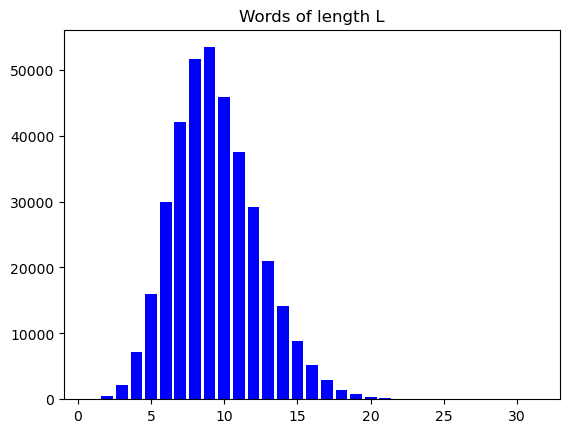

In [27]:
# Dictionary with word-length frequencies
length_frequency = {}

# Due the format of the english_words list we have to drop the last letter in each word
Aux=[ len(word)-1 for word in English_words]

for i in range(max(Aux)):
    length_frequency[i+1] = Aux.count(i+1)

#Plot
plt.bar(length_frequency.keys(),
         length_frequency.values(), color="blue")
plt.title("Words of length L")


#### First letter distribution 
Additionally, we must count to the most probable first letter per word in order two improve the text sample. 

<BarContainer object of 26 artists>

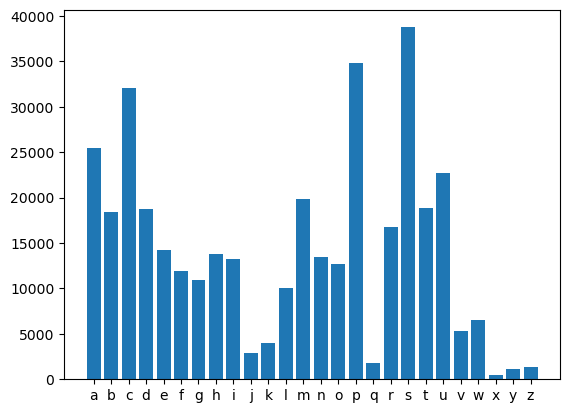

In [28]:
first_letter_dist = {}

frec = []

for i in range(English_words.__len__()):
    frec.append(English_words[i][0:1])


for letter in alphabet:
    first_letter_dist[letter] = frec.count(letter)


plt.bar(first_letter_dist.keys(),
        first_letter_dist.values())    

## Conditional distributions
________

The third type of distributions that we are interested in, are the combinations of the previous two ones, i.e. distributions that have have information about the word length and also about the correlation between the letters within the specific word length.

In [29]:
two_letter_conditional_dist = {}

length_sorted_English_words = English_words
length_sorted_English_words.sort(key = len)

counter = 0

#Most efficient way to create this nested dictionary

for length in length_frequency:

    two_letter_conditional_dist[length] = {letter_tuple : 
    "".join(length_sorted_English_words[counter: counter + length_frequency[length]]).count(letter_tuple) 
    for letter_tuple in alphabet_pow_2}

    counter = length_frequency[length]


#### distribution that given an initial letter x, the word has length L

In [30]:
# first we create a list of dictionaries:
PL_given_x = {}

counter = 0
letter_sorted_English_words = sorted(English_words)


for letter in alphabet:    
    
    # because the format of the English_words variable we must drop the last letter
    Aux = [ len(word)-1 for word in letter_sorted_English_words[counter:counter+first_letter_dist[letter]]]
    
    PL_given_x[letter] = { length: Aux.count(length) for length in length_frequency.keys() }

    counter = first_letter_dist[letter] 
   

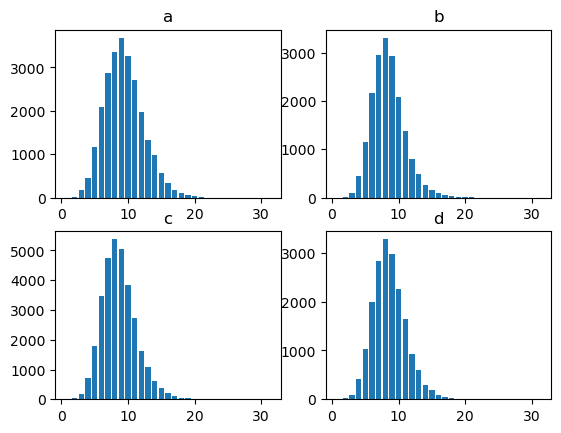

In [31]:
figure, axis = plt.subplots(2, 2)

# For a Function
axis[0, 0].bar(PL_given_x["a"].keys(), PL_given_x["a"].values())
axis[0, 0].set_title("a")
  
# For b Function
axis[0, 1].bar(PL_given_x["b"].keys(), PL_given_x["b"].values())
axis[0, 1].set_title("b")
  
# For c Function
axis[1, 0].bar(PL_given_x["c"].keys(), PL_given_x["c"].values())
axis[1, 0].set_title("c")
  
# For d Function
axis[1, 1].bar(PL_given_x["d"].keys(), PL_given_x["d"].values())
axis[1, 1].set_title("d")
  
# Combine all the operations and display
plt.show()


#### Two-join conditional probability


In [32]:
# first we sort the english words by length:

L_sorted_English_words = English_words
L_sorted_English_words.sort(key = len)

# Now we count the frequency of first letters in each set of words of length L

P_given_L = {}

for i in length_frequency:
    P_given_L[i] = {}

counter = 0

for length in length_frequency:
    
    Aux_list = []

    for word in L_sorted_English_words[counter:counter+length_frequency[length]]:
        Aux_list.append(word[0])

    counter = length_frequency[length]
    
    for letter in alphabet:
        P_given_L[length][letter] = Aux_list.count(letter) 


# Normalized version of the density. Notice that I used a dict compression!

N_P_given_L = {}

for length in P_given_L:

    if length_frequency[length] > 0:
        N_P_given_L[length] = { letter : P_given_L[length][letter]/length_frequency[length] for letter in alphabet}

    else: 
        N_P_given_L[length] = { letter : 0 for letter in alphabet}



In [33]:
length_frequency.values()

dict_values([26, 427, 2130, 7186, 15920, 29874, 41998, 51627, 53402, 45872, 37539, 29125, 20944, 14149, 8846, 5182, 2967, 1471, 760, 359, 168, 74, 31, 12, 8, 0, 3, 2, 2, 0, 1])

## Building the monkey
_________
Now we are prepared to build our smart monkey. We will do this, by performing the following steps:

1. First, the monkey randomly will choose the length of word.
2. Second, once the initial word length $L$ is obtained, the monkey will sample the most probable first letter in an length $L$ word.
3. Third; once the first letter is sampled, the monkey will search by the second letter by looking what is the most probable one.

In [34]:
def normalization(input_list):
    """"
    Given a list of positive reals, returns the normalized version of the list.  
    """
    if sum(input_list) > 0:
        normalized_list = [x/sum(input_list) for x in input_list] 

    # If there is probability = 0
    else:
        normalized_list = input_list

    return normalized_list


def smart_random_word():
    """
    Builds a word based on the statistics of word_lengths, letter_correlations and joint distributions taken from the Dataset.
    """
 
    #sample the word length from the length probability distribution!
    Length_weights = normalization(length_frequency.values())
    Lengths = list(length_frequency.keys())
    Length = rng.choice(Lengths,p = Length_weights)

    #sample the first letter from the joint probability P(x| length = L)

    word = []
    first_letter = rng.choice(alphabet, p = list(N_P_given_L[Length].values()))
    word.append(first_letter)

    # Now we sample the other letters based on the first one used the two-point letter correlation
    
    running_letter = first_letter

    for i in range(Length - 1):

        aux = [two_letter_conditional_dist[Length][running_letter + a] for a in alphabet]
        running_letter = (rng.choice(alphabet, p = normalization(aux)))        
        word.append(running_letter)

    return "".join(word)    


def N_word_message(N):
    """
    returns an N-word message typed by some smart monkey.
    """    
    sentence = []
    for word_number in range(N):
        sentence.append(smart_random_word())

    return " ".join(sentence)


### Results V1
_______

In [35]:
N_word_message(10)

'galaui ftellydly giterblsm snookeximi rachuly digruladerm mmadeamb cororuloue desultobitwi antheler'